In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [72]:
customerData = pd.read_csv(r'Mall_Customers.csv')
customerData.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [73]:
customerData.shape

(200, 5)

In [74]:
customerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [75]:
customerData.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [76]:
customerData.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [77]:
sns.set(style='whitegrid')

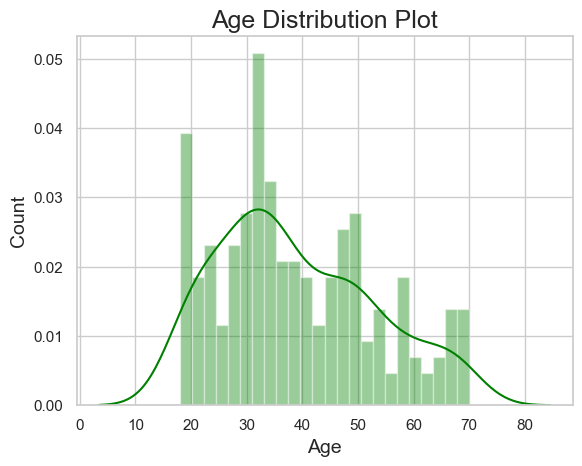

In [78]:
sns.distplot(customerData['Age'],color= 'green',bins=24)
plt.title('Age Distribution Plot', fontsize = 18)
plt.xlabel('Age', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.show()

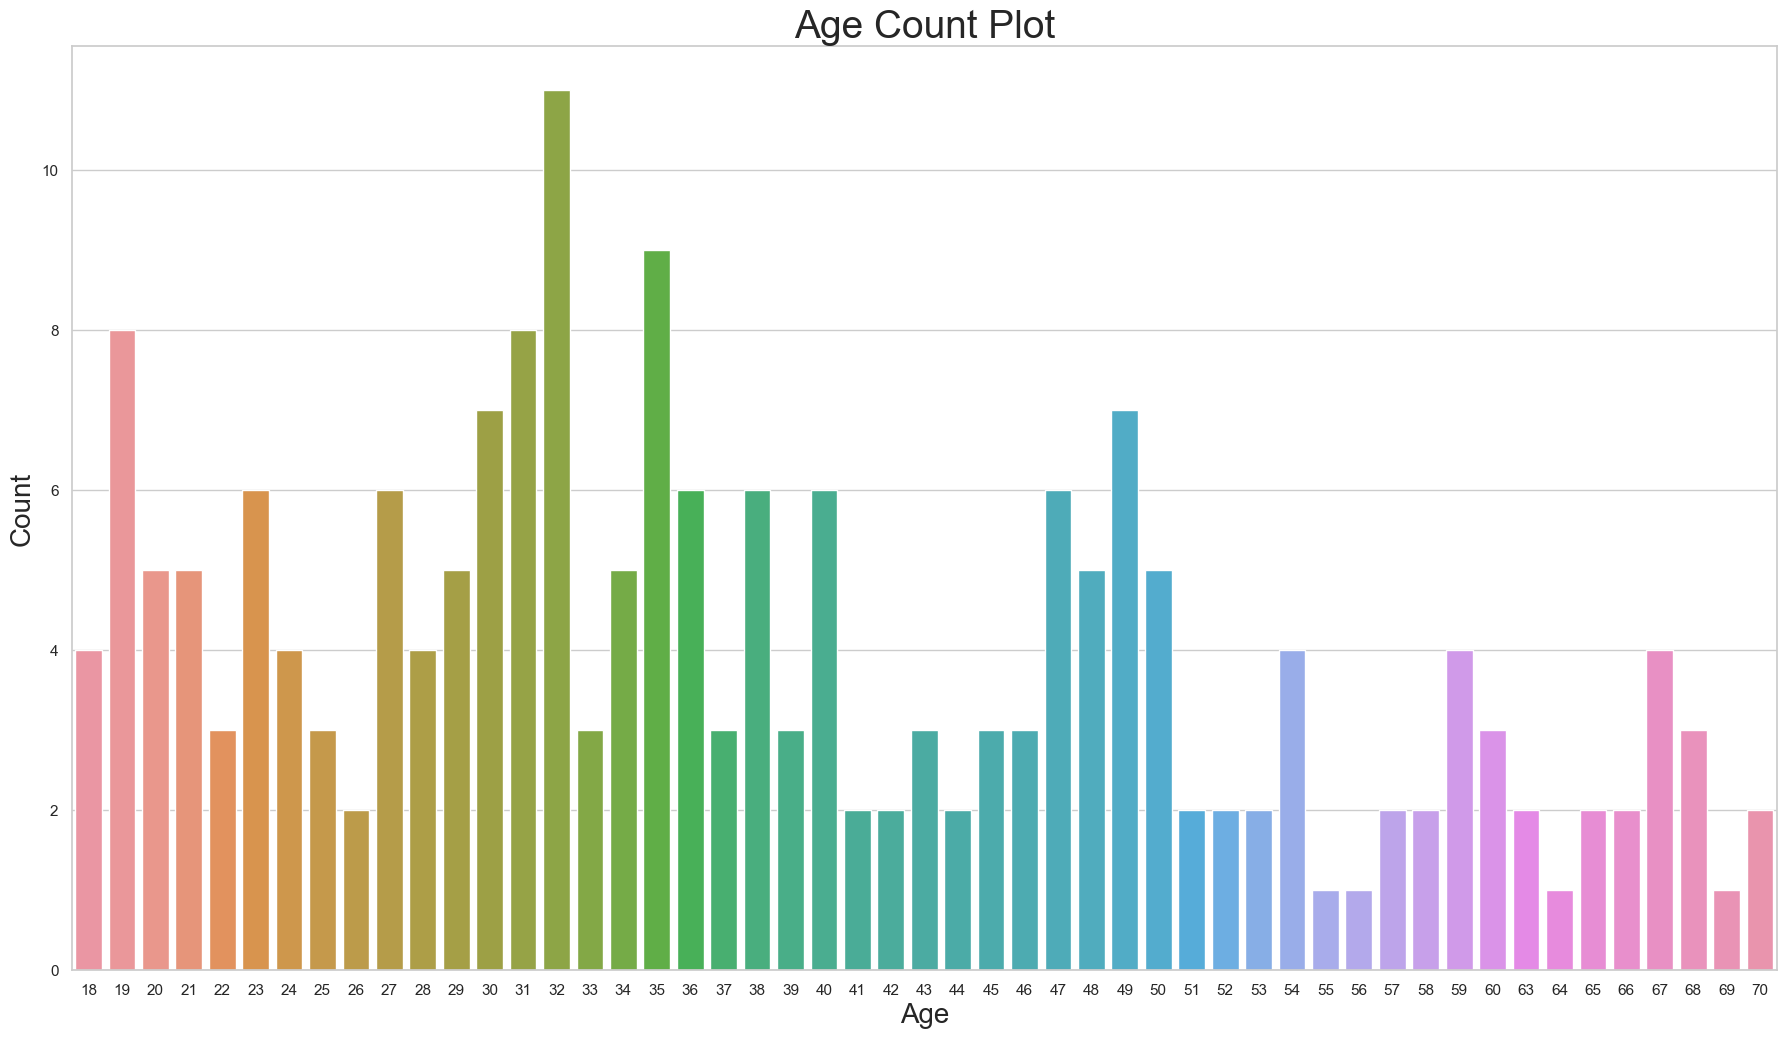

In [79]:
plt.figure(figsize=(22,12))
sns.countplot(customerData['Age'])
plt.title('Age Count Plot', fontsize = 28)
plt.xlabel('Age', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.show()

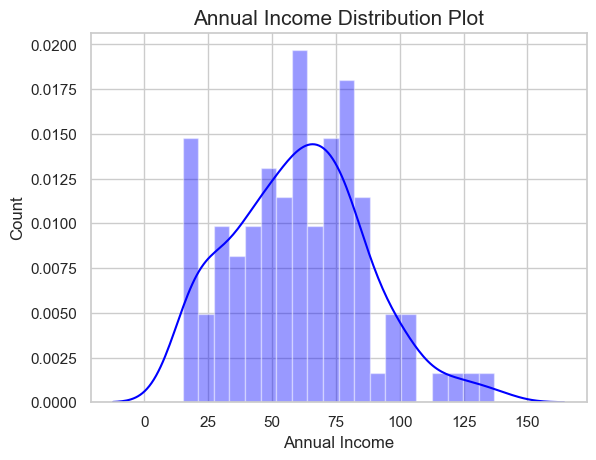

In [80]:
sns.distplot(customerData['Annual Income (k$)'],color= 'blue',bins=20)
plt.title('Annual Income Distribution Plot', fontsize = 15)
plt.xlabel('Annual Income', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.show()

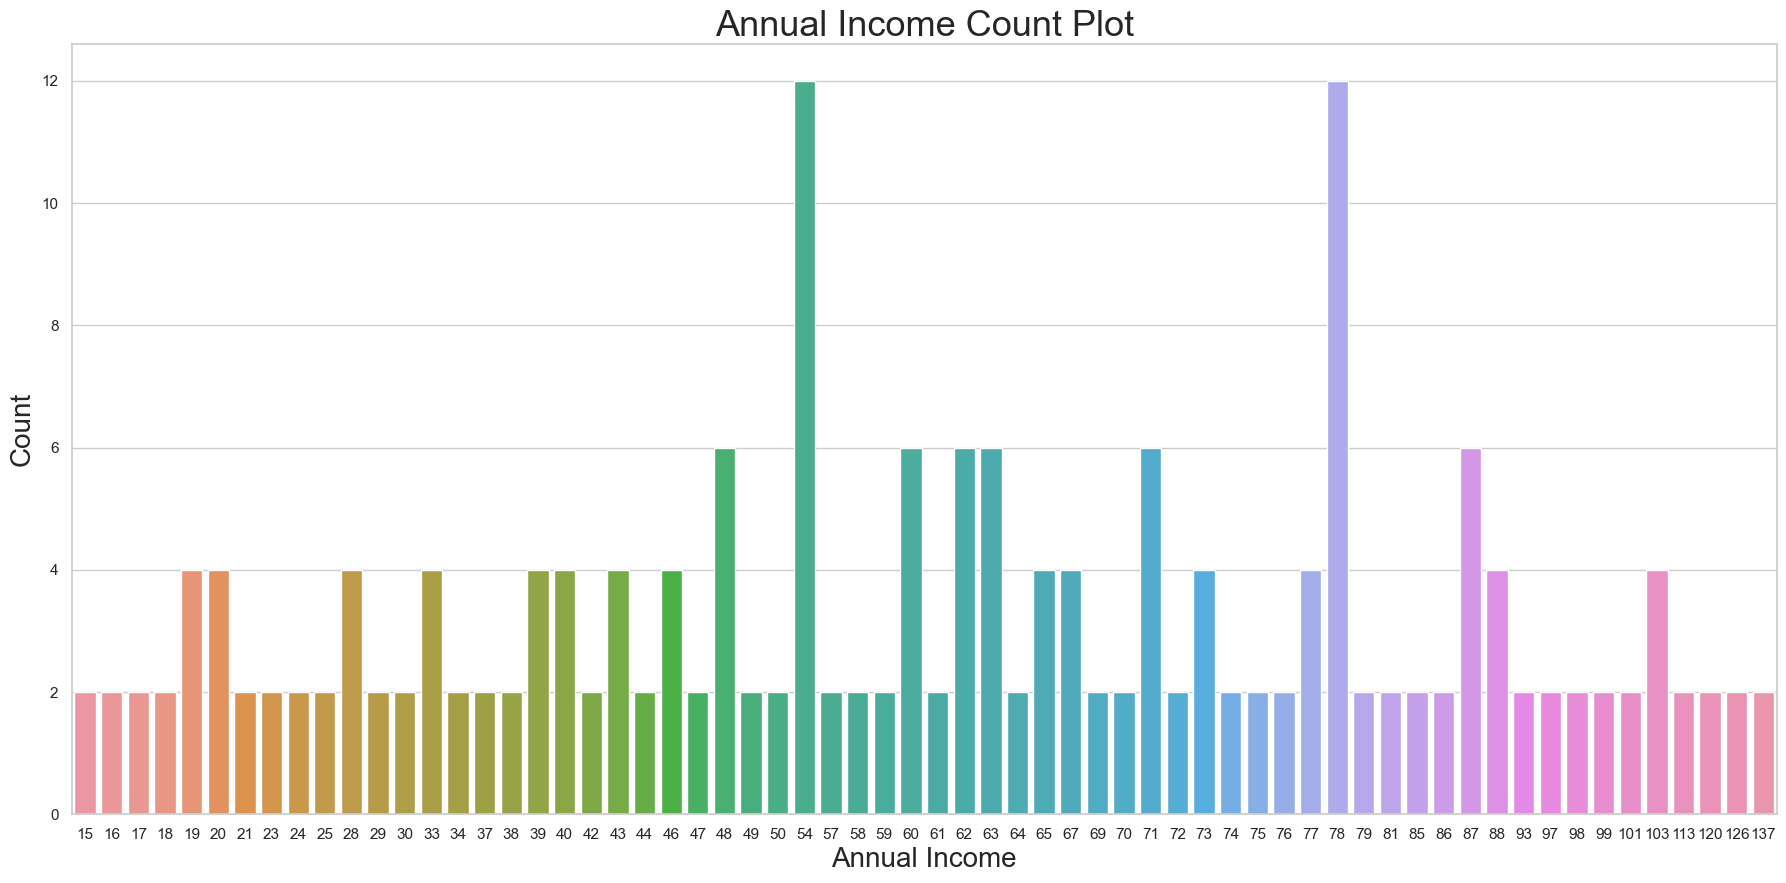

In [81]:
plt.figure(figsize=(22,10))
sns.countplot(customerData['Annual Income (k$)'])
plt.title('Annual Income Count Plot', fontsize = 26)
plt.xlabel('Annual Income', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.show()

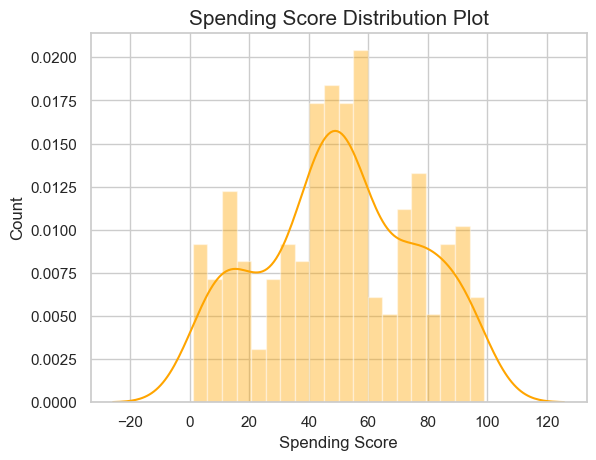

In [82]:
sns.distplot(customerData['Spending Score (1-100)'],color= 'orange',bins=20)
plt.title('Spending Score Distribution Plot', fontsize = 15)
plt.xlabel('Spending Score', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.show()

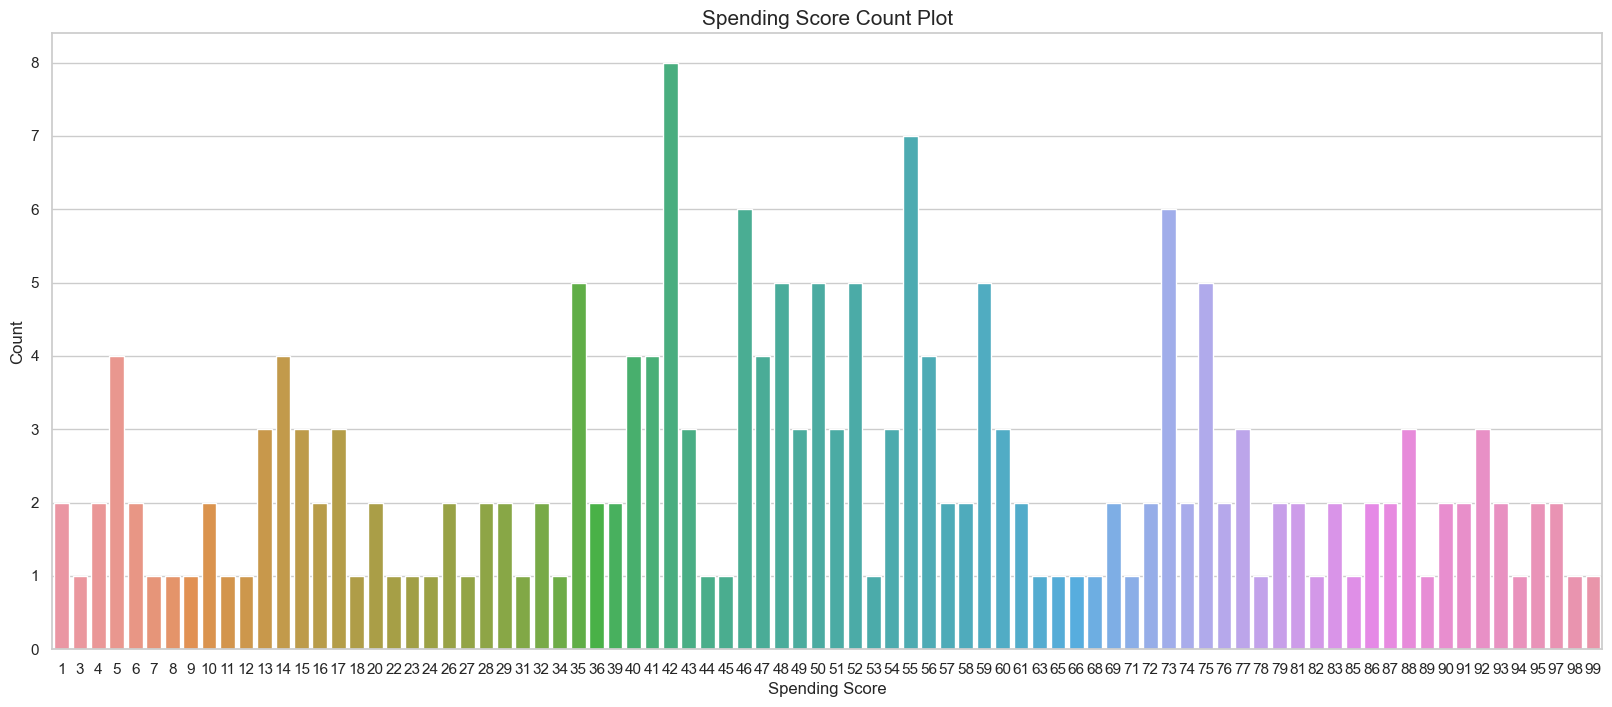

In [83]:
plt.figure(figsize=(20,8))
sns.countplot(customerData['Spending Score (1-100)'])
plt.title('Spending Score Count Plot', fontsize = 15)
plt.xlabel('Spending Score', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.show()

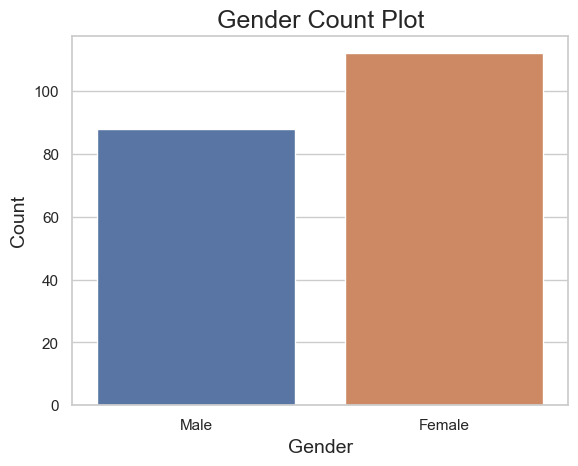

In [84]:
sns.countplot(x='Gender', data=customerData)
plt.title('Gender Count Plot', fontsize = 18)
plt.xlabel('Gender', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.show()

<AxesSubplot:>

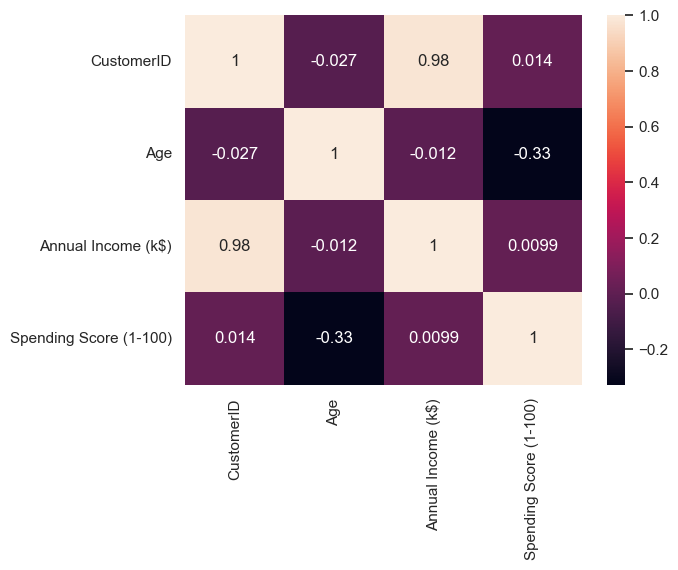

In [85]:
sns.heatmap(customerData.corr(), annot = True)

In [86]:
workOn = customerData[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values

In [87]:
print(workOn)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [88]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 12, random_state = 0)
    kmeans.fit(workOn)    
    wcss.append(kmeans.inertia_)

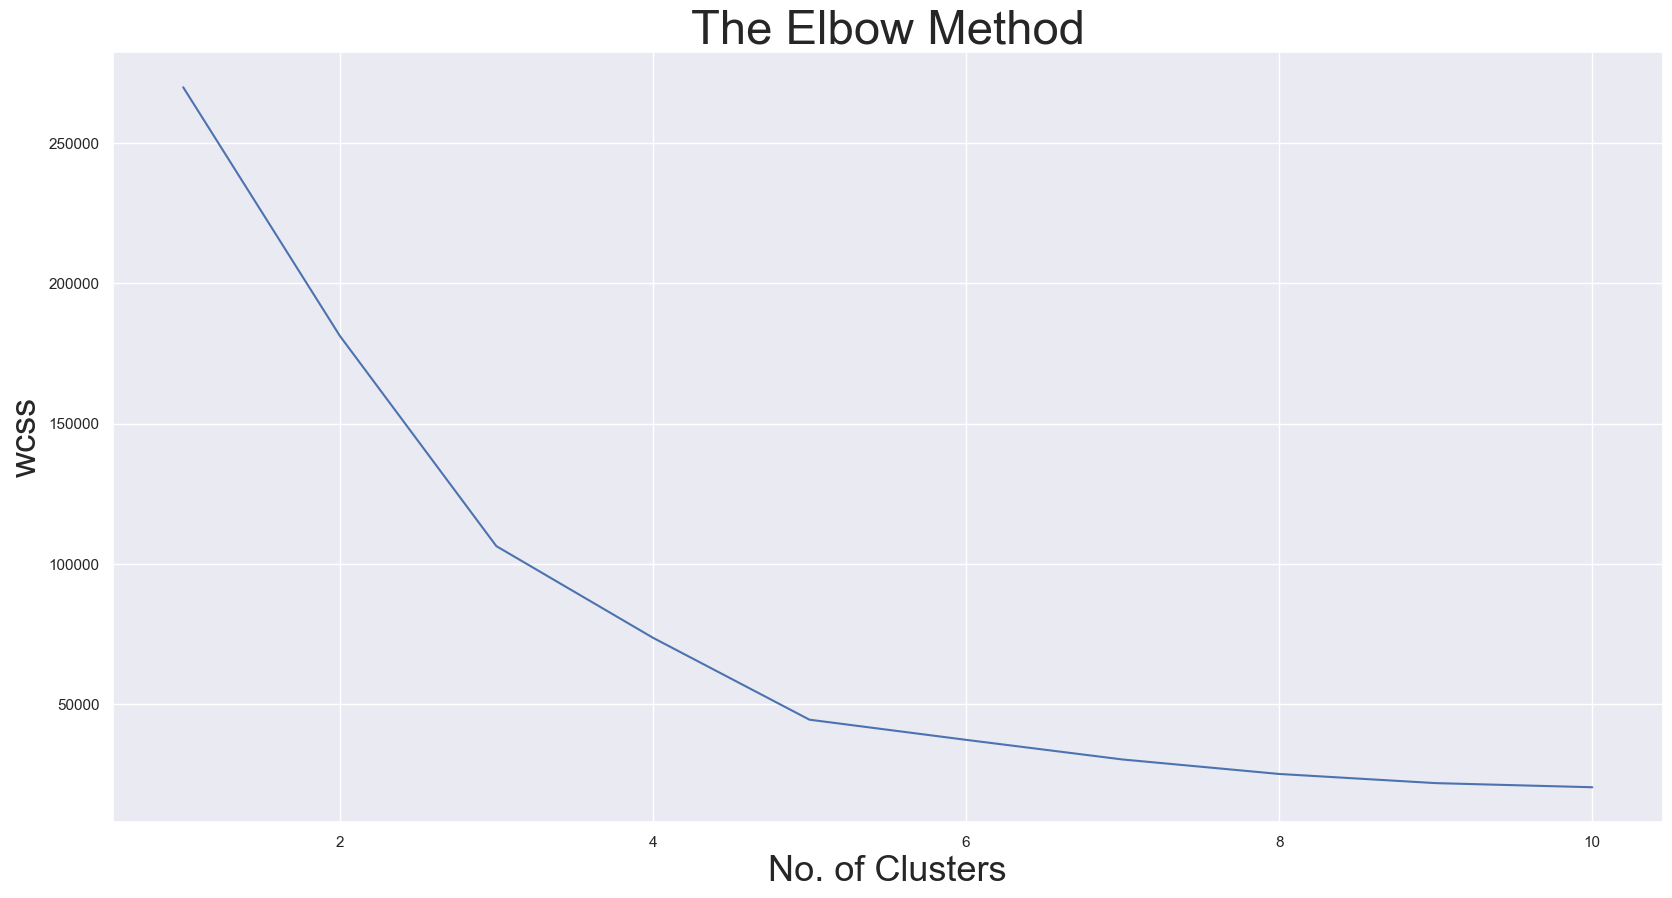

In [89]:
sns.set()
plt.figure(figsize=(20,10))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 34)
plt.xlabel('No. of Clusters', fontsize = 26)
plt.ylabel('wcss', fontsize = 26)
plt.show()

In [90]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

A = kmeans.fit_predict(workOn)

print(A)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


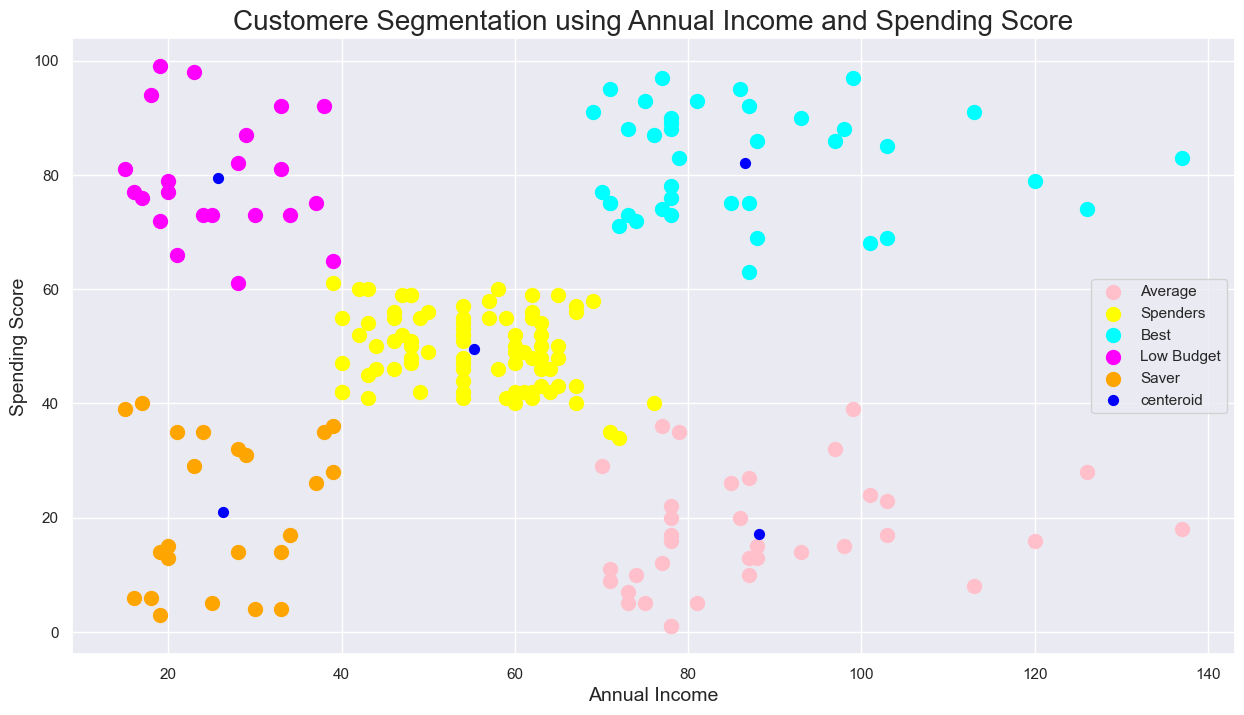

In [91]:
plt.figure(figsize=(15,8))
plt.scatter(workOn[A == 0, 0], workOn[A == 0,1], s = 100, c = 'pink', label = 'Average')
plt.scatter(workOn[A == 1, 0], workOn[A == 1,1], s = 100, c = 'yellow', label = 'Spenders')
plt.scatter(workOn[A == 2, 0], workOn[A == 2,1], s = 100, c = 'cyan', label = 'Best')
plt.scatter(workOn[A == 3, 0], workOn[A == 3,1], s = 100, c = 'magenta', label = 'Low Budget')
plt.scatter(workOn[A == 4, 0], workOn[A == 4,1], s = 100, c = 'orange', label = 'Saver')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')
plt.legend()
plt.title('Customere Segmentation using Annual Income and Spending Score', fontsize = 20)
plt.xlabel('Annual Income', fontsize = 14)
plt.ylabel('Spending Score', fontsize = 14)
plt.show()